In [0]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt 
import os, sys
from google.colab import files

In [0]:

try:
    import progressbar # import progress bar
    
    #if does not work import progress bar2
except ImportError:
  !pip3 install -q progressbar2
  import progressbar

In [66]:
uploaded = files.upload()

Saving linear_data.csv to linear_data (2).csv


In [67]:
data = np.loadtxt('linear_data.csv', delimiter=',') # load in the data
print(data.shape)

(1000, 3)


In [68]:
labels = data[:, -1]
print(labels.shape)

(1000,)


In [69]:
data = data[:, 0:2] #take off labels off data for training
print(data.shape)

(1000, 2)


In [0]:
positive_x = data[labels == 1, 0]
positive_y = data[labels == 1, 1]

In [0]:
negative_x = data[labels == 0, 0]
negative_y = data[labels == 0, 1]

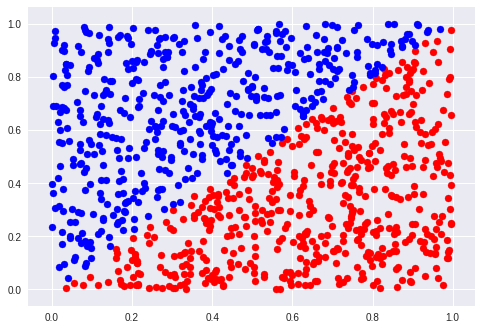

In [72]:
plt.scatter(positive_x, positive_y, c ='r')
plt.scatter(negative_x, negative_y, c ='b')
plt.show()

In [73]:
# weight matrix = [input dim + 1, number of perceptrons]
# initialize random weights. 3 weights, two for each data input and one for
# the bias
weights = np.random.randn(2, ) * 0.01
print(weights)

[0.01108475 0.00427966]


In [0]:
lr = 0.05  # how much to change the weight values each time

In [0]:
errors = []  # create an empty list called for errors


In [0]:
# have i count up to the number of samples in the dataset, 
# and each time, do what the indented lines below say
for i in range(data.shape[0]):
  
  # forward pass
  x = data[i, :]  # take out the ith sample
  y = labels[i]  # take out the label for the ith sample
  out = np.dot(x, weights)  # get the weighted sum for this example
  out = np.round(out)  # round the output to 1 if its greater than .5 or 0 otherwise
  
  # backward pass 
  error = y - out # difference between network's output and actual label
  errors.append(error) # add new error to end of errors 
  
  weights += lr * (error * x)  # update the weights

In [77]:
print(weights)

[ 1.34368514 -0.59798519]


In [0]:
# send all of the data through and get the output for every sample
all_out = np.round(np.matmul(data, weights))

In [79]:

# calculate the accuracy over the training samples by seeing if the output 
# for each sample matches the label for that sample. If it does, it will return
# 1, if not it will return 0 for that sample. Then take the mean to get mean accuracy. 
correct = (all_out == labels)
print(np.mean(correct))

0.822


In [0]:
# get all of the data samples where the perceptron pridicted 0
pred_neg = data[all_out == 0, :]

# get all of the data samples where the perceptron predicted 1
pred_pos = data[all_out == 1, :]


In [0]:
# calculate the difference between each label and its respective ouptut
diff = labels - all_out

# take the samples out of data where the difference is not 0 (the ones it got wrong.)
wrong_pred = data[diff != 0, :]

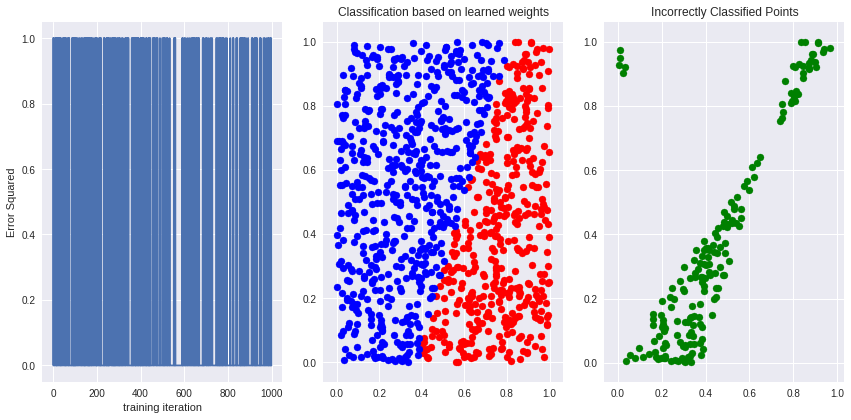

In [82]:
# create a figure
fig = plt.figure(figsize=(12, 6))

# create three subplots within the figure in a row
subplot1 = fig.add_subplot(131)
subplot2 = fig.add_subplot(132)
subplot3 = fig.add_subplot(133)

# set the xlabels and ylabels for subplot 1
subplot1.set_xlabel('training iteration')
subplot1.set_ylabel('Error Squared')

# tell subplot 1 what it's supposed to show
subplot1.plot(np.absolute(errors))

# set just a title for subplot 2
subplot2.set_title('Classification based on learned weights')

# tell subplot 2 to make a scatter plot where the ones predicted to be
# 1 by the perceptron are colored red and their x and y locations
subplot2.scatter(pred_pos[:, 0], pred_pos[:, 1], c='r')

# tell subplot 2 to also make the negative predictions blue and plot them
# according to their x and y values
subplot2.scatter(pred_neg[:, 0], pred_neg[:, 1], c='b')

# make a title for the third subplot
subplot3.set_title('Incorrectly Classified Points')

# make a scatter plot using the ones it got wrong
subplot3.scatter(wrong_pred[:, 0], wrong_pred[:, 1], c='g')

# use this when there are a lot of subplots/words...sometimes doesn't show right otherwise
plt.tight_layout()
plt.show() # show the plot

In [86]:
print(np.mean(correct))

0.822


Without the bias cell the accuracy of the network decreased by 15%. This is because the bias is needed to start the sigmoid function when x = 0 not from 0 but from another value to get an accurate prediction.